# Specifying relations between linguistic objects
This tutorial will introduce the different ways of specifiying the relations between linguistic objects. The function of the most important relational operators will be shown.


# Getting the TF workbench ready
The first thing we need to do in our jupyter notebook is to
1. load the TF program
2. load the TF database

In [146]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

In [148]:
# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [150]:
# Now we load a few databases
#BHSa2017 = use('etcbc/bhsa', version='2017')
#BHSaLatest = use('etcbc/bhsa:latest')
#BHSaC = use('etcbc/bhsa', version='c', mod='CenterBLC/BHSaddons/tf')
BHS = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf', hoist=globals())
bhsF, bhsL, bhsT, bhsS = BHS.api.F, BHS.api.L, BHS.api.T, BHS.api.S

LXX = use("CenterBLC/LXX", version="1935", hoist=globals())
lxxF, lxxL, lxxT, lxxS = LXX.api.F, LXX.api.L, LXX.api.T, LXX.api.S

DSS = use('etcbc/dss', hoist=globals())
dssF, dssL, dssT, dssS = DSS.api.F, DSS.api.L, DSS.api.T, DSS.api.S

GNT = use ("CenterBLC/N1904", version="1.0.0", mod="CenterBLC/N1904/BOLcomplement/tf/", hoist=globals())
gntF, gntL, gntT, gntS = GNT.api.F, GNT.api.L, GNT.api.T, GNT.api.S

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,57,10941.98,100
chapter,1192,523.23,100
verse,30371,20.54,100
subverse,30419,20.50,100
word,623693,1.00,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
scroll,1001,1428.81,100
lex,10450,129.14,94
fragment,11182,127.91,100
line,52895,27.04,100
clause,125,12.85,0
cluster,101099,6.68,47
phrase,315,5.10,0
word,500995,2.81,99
sign,1430241,1.00,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,27,5102.93,100
chapter,260,529.92,100
verse,7944,17.34,100
sentence,8011,17.20,100
group,8945,7.01,46
clause,42506,8.36,258
wg,106868,6.88,533
phrase,69007,1.90,95
subphrase,116178,1.60,135
word,137779,1.00,100


Display is setup for viewtype [syntax-view](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/syntax-view.md#start)

See [here](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/viewtypes.md#start) for more information on viewtypes

# What are relational operators?
Relational operators are signs that specify the relation between two linguistic objects. Lets say we have ```element_A``` and ```element_B```, and we want ```element_A``` to precede ```element_B```.

|first|second|
|:---:|:---:|
|```element_A```|```element_B```|

To define this relation we will use the operator ```<```:

|first|operator|second|
|:---:|:---:|:---:|
|```element_A```|```<```|```element_B```|


While the operator ```<``` makes ```element_A``` precede ```element_B``` it does not define the distance by which ```element_B``` actually follows ```element_A```. The following cenarios are all possible:

```element_A``` ```element_B```

or
```element_A``` ```element_X``` ```element_B```

or 
```element_A``` ```element_X``` ```element_Y``` ```element_B```

etc.

If we want to specify that ```element_B``` must follow right after ```element_A``` without any other elements interrupting we need to use the operator ```<:```:

|first|operator|second|
|:---:|:---:|:---:|
|```element_A```|```<:```|```element_B```|

The operator allows only for this order:


```element_A``` ```element_B```



Lets use a concrete example...
## Nestle1904 examples
Lets pull up the text of John 1:1.

In [22]:
John1_1='''
book book=John
 chapter chapter=1
  verse verse=1
'''
John1_1=GNT.search(John1_1)
GNT.show(John1_1, start=1, end=50, condensed=True)

  0.02s 1 result


Lets say we want to find each word that follows right afer the word λόγος. In that case we would have to use the operator ```<:```. Lets restrict ourselves to John 1:1 and highlight the word following right after λόγος with the magenta color:

In [25]:
John1_1='''
verse book=John chapter=1 verse=1
   word lemmatranslit=logos
   <: word
'''
John1_1=GNT.search(John1_1)
GNT.show(John1_1, start=1, end=50, condensed=False, colorMap={5: 'magenta'})

  0.07s 2 results


As can be seen, we have identfied with the help of the operator ```<:``` each word that follows right after λόγος.

But what if we where to use the operator ```<``` instead?

In [28]:
John1_1B='''
verse book=John chapter=1 verse=1
   word lemma_translit=logos
   < word
'''
John1_1B=GNT.search(John1_1B)
GNT.show(John1_1B, start=1, end=2, condensed=False, colorMap={5: 'magenta'})

  0.09s 21 results


A total of 21 results are found! That is because each word that follows one of the two λόγος is counted as a result.

Lets reverse the order and find each word that appears right before λόγος. YOu probably guessed already, we are going to reverse the operator into ```:>```:

In [31]:
John1_1C='''
verse book=John chapter=1 verse=1
   word lemmatranslit=logos
   :> word
'''
John1_1C=GNT.search(John1_1C)
GNT.show(John1_1C, start=1, end=50, condensed=False, colorMap={5: 'magenta'}, multiFeatures=False)

  0.15s 3 results


# Visual organization of operators
When writing TF queries the order of lines has no effect on the architecture of the query (this is in contrast to MQL queries that are used in SHEBANQ). The only thing that has an effect is the indentation. Thus, the following two queries will bring the same results:

```python
verse
    word lex_og=logos
    word lex_og=theos
```

```python
verse
    word lex_og=theos
    word lex_og=logos
```


Thus, if one wants to specify the order of the elments one MUST use OPERATORS. Lets say you want to to have theos follow logos you could write:

```python
verse
    word lex_og=logos
    < word lex_og=theos
```

OR
```python
verse
    word lex_og=theos
    > word lex_og=logos
```

You will often use many linguistic objects and will often want to define their internal relationship. In order to keep well organized you can specify the relations of each element at the bottom of your actual query:

```python
verse
    w1:word lex_og=logos
    w2:word lex_og=theos
w1 < w2
```

Each line has a placeholdername ```w1```/```w2``` that can later be used to define the relations between both words. Thus the following queries will generate the same results:

```python
verse
    word lex_og=logos
    < word lex_og=theos
```

AND 

```python
verse
    w1:word lex_og=logos
    w2:word lex_og=theos
w1 < w2
```

Lets test my claim: We are going to look for all cases where theos is being followed right after (```<:```) logos in the NT:



In [34]:
JohnLogosTheos='''
verse
   word lemmatranslit=logos
   <: word lemmatranslit=theos
'''
JohnLogosTheos=GNT.search(JohnLogosTheos)
GNT.show(JohnLogosTheos, start=1, end=2, condensed=False, colorMap={3: 'magenta'}, multiFeatures=False)

  0.11s 2 results


In [36]:
JohnLogosTheosB='''
verse
   w1:word lemmatranslit=logos
   w2:word lemmatranslit=theos
w1 <: w2
'''
JohnLogosTheosB=GNT.search(JohnLogosTheosB)
GNT.show(JohnLogosTheosB, start=1, end=50, condensed=False, colorMap={3: 'magenta'}, multiFeatures=False)

  0.12s 2 results


And indeed, while the query syntax is a little bit different each query generates the same results.

# All relational operators `relationsLegend()`

Sofar we have gotten to know the following relational operators:

```
<
```

```
<:
```

```
>
```

```
:>
```

But there are many more. We can quickly get an overview of all operators with the command

```S.relationsLegend()```

In [42]:
gntS.relationsLegend()

                      = left equal to right (as node)
                      # left unequal to right (as node)
                      < left before right (in canonical node ordering)
                      > left after right (in canonical node ordering)
                     == left occupies same slots as right
                     && left has overlapping slots with right
                     ## left and right do not have the same slot set
                     || left and right do not have common slots
                     [[ left embeds right
                     ]] left embedded in right
                     << left completely before right
                     >> left completely after right
                     =: left and right start at the same slot
                     := left and right end at the same slot
                     :: left and right start and end at the same slot
                     <: left immediately before right
                     :> left immediately after right
   

In the following I will focus on a few more important relational operators that you will probably use on a regular basis.

## Distance definitions
The **k-nearly** options come in handy if you want to define a certain range of distance between different linguistic elements. 

Lets say you want to identify the first six words of John 1:1:

```
    verse verse=1
      =5: word
```

The operator `=5:` says that  we want to identify exactly (=) 5 words (5) that appear between the very beginning (:) of the `verse` and its final word (the sixth word).

In [46]:
FifthWord='''
verse book=John chapter=1 verse=1
      =4: word
'''
FifthWord=GNT.search(FifthWord)
GNT.show(FifthWord, start=1, end=60, condensed=True, colorMap={5:'magenta'})

  0.03s 5 results


As we can see, καὶ is the sixth word of John 1:1. We could have written the query also in the following way:

```
FifthWord='''
v:verse book=John chapter=1 verse=1
    w:word
v =5: w
'''
```


Lets now stay with this καὶ and look for all words that are within the range of 3 words around καὶ.
We do this by using the operator `<3:':
```
    verse verse=1
      word lemmatranslit=kai
      <3: word
```

In [49]:
ThreeSurrounding='''
verse book=John chapter=1 verse=1
      word lemmatranslit=kai
      <3: word
'''
ThreeSurrounding=GNT.search(ThreeSurrounding)
GNT.table(ThreeSurrounding, start=1, end=14, condensed=True, colorMap={5: 'magenta'})

  0.09s 14 results


n,p,verse,word,word,word,word,word,word,word,word,word,word,word,word,word,word
1,John 1:1,,ὁ,"Λόγος,",καὶ,ὁ,Λόγος,ἦν,πρὸς,τὸν,"Θεόν,",καὶ,Θεὸς,ἦν,ὁ,Λόγος.


As you can see, a whole range of words in the proximity of `<3:` are identified around both καὶ. For the first καὶ the results look like this:

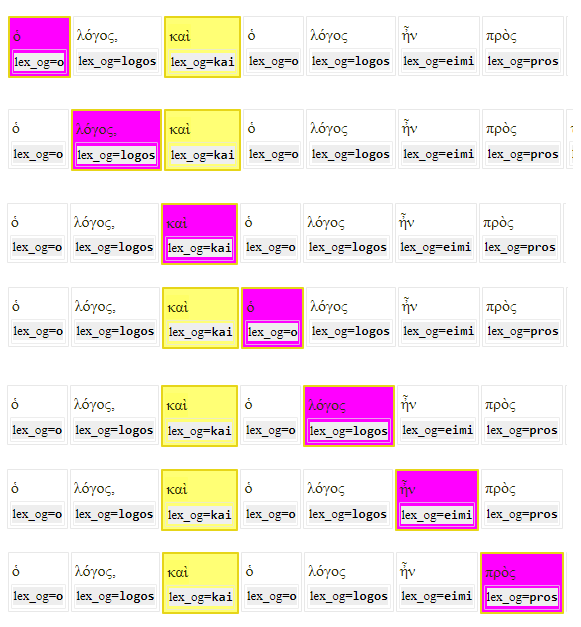


One could also write the query in the following way:

```python
ThreeSurrounding='''
book book=John
  chapter chapter=1
    verse verse=1
      w1:word lemmatranslit=kai
      w2:word
w1 <3: w2
'''
```

Obviously the `K-nearest` goes in both directions. If you want to go only in the forward direction you would have to add another relational operator:

```python
ThreeSurrounding='''
book book=John
  chapter chapter=1
    verse verse=1
      w1:word lemmatranslit=kai
      w2:word
w1 <3: w2
w1 < w2
'''
```

Now we have to relational condition. Since both have to match we are now only going to find all words up to a distance of three from the καὶ on forward:

In [52]:
ThreeForwardOnly='''
book book=John
  chapter chapter=1
    verse verse=1
      w1:word lemmatranslit=kai
      w2:word
w1 <3: w2
w1 < w2
'''
ThreeForwardOnly=GNT.search(ThreeForwardOnly)
GNT.table(ThreeForwardOnly, start=1, end=60, condensed=False, colorMap={5: 'magenta'})

  0.14s 8 results


n,p,book,chapter,verse,word,word
1,John 1:1,John,John 1,,καὶ,ὁ
2,John 1:1,John,John 1,,καὶ,Λόγος
3,John 1:1,John,John 1,,καὶ,ἦν
4,John 1:1,John,John 1,,καὶ,πρὸς
5,John 1:1,John,John 1,,καὶ,Θεὸς
6,John 1:1,John,John 1,,καὶ,ἦν
7,John 1:1,John,John 1,,καὶ,ὁ
8,John 1:1,John,John 1,,καὶ,Λόγος.


Here are the results:
    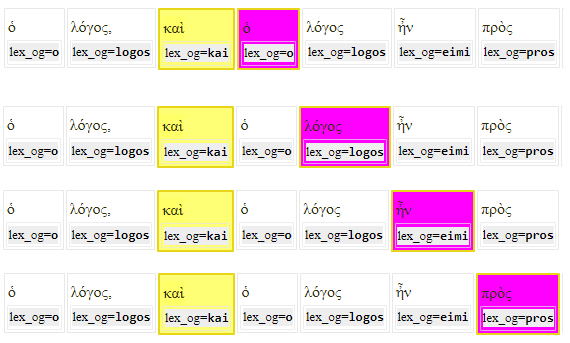

## Only One Object within Another Object
Often you want to make sure that there is just one word in a phrase. So you want to exclude the possibility of many words appearing in a single phrase. This can be done with the operator `==`.

Lets first look for all object phrases in Gen 1 that contain only one word:

In [56]:
OneWordObject='''
verse book=Genesis chapter=1
 phrase function=Objc
   == word lex*
'''
OneWordObject=BHS.search(OneWordObject)
BHS.show(OneWordObject, start=1, end=2, condensed=False, colorMap={5: 'magenta'})

  0.54s 17 results


What would happen if we do not specify the relation between the word and its phrase with `==`?

In [59]:
WordInObject='''
verse book=Genesis chapter=1
 phrase function=Objc
   word lex*
'''

WordInObject=BHS.search(WordInObject)
BHS.show(WordInObject, start=8, end=9, condensed=True)

  0.38s 132 results


As expected any object phrase that contains at least one word is being detected.

Alternatively, one could use the boundaries of the linguistic object to restrict the number of words appearing in an object phrase to only one word by using `::`:

In [92]:
WordInObject='''
verse book=Genesis chapter=1
 phrase function=Objc
   :: word lex*
'''

WordInObject=BHS.search(WordInObject)
BHS.show(WordInObject, start=8, end=9, condensed=True)

  0.75s 17 results


## Feature relation
Imagine you want to find two linguistic objects that have to agree in regard to a certain feature, e.g. "lexeme". Theses (dis)agreements can also be defined by relational operators.


The feature comparison operators are really powerful! Here they are:


| .f.       | left.f = right.f       |
| :---      | :---                   |
| .f=g.     | left.f = right.g       |
| .f\~r\~g. | left.f matches right.g |
| .f\#g.    | left.f \# right.g      |
| .f\>g.    | left.f \> right.g      |
| .f\<g.    | left.f \> right.g      |


Lets create some examples.

### Same Lexeme
Imagine you want to find two adjacent clauses

```
  c1:clause
  c2:clause
c1 <: c2
```

who share the same lexeme of words appearing in the subject of the first clause and the object of the second clause

```
  w1:word
  w2:word
w1 .lex. w2
```

This would result in the following query:

```python
SameLex='''
book book=Genesis
  c1:clause
      phrase function=Subj
        w1:word lex*
  c2:clause
      phrase function=Objc
        w2:word lex*
c1 <: c2
w1 .lex. w2
'''
```

In [95]:
SameLex='''
book book=Genesis
  c1:clause
      phrase function=Subj
        w1:word lex*
  c2:clause
      phrase function=Objc
        w2:word lex*
c1 <: c2
w1 .lex. w2
'''
SameLex=BHS.search(SameLex)
BHS.show(SameLex, start=1, end=4, condensed=False, colorMap={4: 'magenta', 7:'red'})

  0.88s 83 results


### Same consonants but different Lexeme
Think for example of the wordplay in Jer 1:11-12:

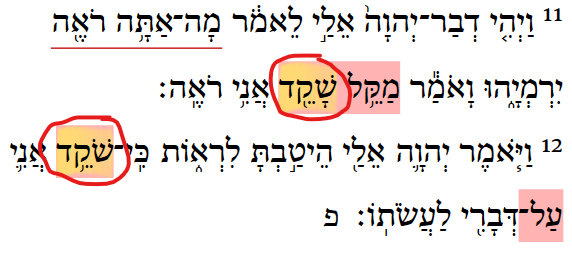

How could you find all cases where we have two different words that are sharing the same consonants?

ps:`lex_cons` is a new feature I created and can be downloaded on my github site: https://github.com/oliverglanz/bhsa_feature-additions.

In [98]:
DiffLexSameCons = '''
chapter book=Jeremia chapter=1
    w1:word
    w2:word
w1 < w2
w1 <20: w2
w1 .lex_cons=lex_cons. w2
w1 .lex#lex. w2
'''
DiffLexSameCons  = BHS.search(DiffLexSameCons)
BHS.table(DiffLexSameCons, start=1, end=10, condensed=False,  colorMap={2: 'magenta', 3:'cyan'})

  0.19s 4 results


n,p,chapter,word,word
1,Jeremiah 1:2,Jeremiah 1,מֶ֣לֶךְ,מָלְכֹֽו׃
2,Jeremiah 1:2,Jeremiah 1,מָלְכֹֽו׃,מֶ֣לֶךְ
3,Jeremiah 1:2,Jeremiah 1,מָלְכֹֽו׃,מֶ֣לֶךְ
4,Jeremiah 1:11,Jeremiah 1,שָׁקֵ֖ד,שֹׁקֵ֥ד


### Number (In)Congruence
Or imagine you want to find all cases in which the number of the predicate does not match the number of a single-word subject!

In [101]:
DiffNumber='''
clause
 p1:phrase function=Pred
     w1:word
 p2:phrase function=Subj
     w2:word

p1 # p2
p2 == w2
w1 .nu#nu. w2

'''
DiffNumber=BHS.search(DiffNumber)
BHS.show(DiffNumber, start=200, end=210, condensed=False, colorMap={3: 'magenta', 5:'red'})

  1.04s 1358 results


### Person (In)Congruence
Part of default Hebrew Syntax is that the pronominal suffix used in a phrase matches the PNG of the personal pronoun appearing in the same phrase. For example: **I and my wife** are going to town. Lets see whether this is true:

In [103]:
PronSuffCongruence='''
clause
 phrase
     w1:word sp=prps
     w2:word

w1 # w2
w1 .ps=prs_ps. w2
'''
PronSuffCongruence=BHS.search(PronSuffCongruence)
BHS.show(PronSuffCongruence, start=1, end=2, condensed=False, extraFeatures={'function'}, colorMap={3: 'magenta', 5:'red'})

  0.43s 321 results


Obviously there are several hundreds of cases that show this standard behavior. But what are the deviations?

In [105]:
PronSuffInCongruence='''
clause
 phrase
     w1:word sp=prps
     w2:word prs_ps=p1|p2|p3

w1 # w2
w1 .ps#prs_ps. w2
'''
PronSuffInCongruence=BHS.search(PronSuffInCongruence)
BHS.show(PronSuffInCongruence, start=10, end=11, condensed=False, extraFeatures={'function'}, colorMap={3: 'magenta', 5:'red'})

  0.39s 33 results


Only rarly does this phenomenon appear. Interstingly it appears in Ex 33 where we find a discussion about whose people the people of Israel are: God's people or Moses people. Moses claims "I and **your** people!".

### Gender (In)Congruence

In [111]:
GenderDisagreement='''
book book=Genesis
  clause
    p1:phrase function=Pred
      w1:word gn=m|f
    p2:phrase function=Subj
      w2:word gn=m|f
p2 == w2
w1 .gn#gn. w2
'''
GenderDisagreement=BHS.search(GenderDisagreement)
BHS.show(GenderDisagreement, start=1, end=10, condensed=True)

  0.76s 3 results


### Same consonants in different clauses
Lets find all cases where two adjacent clauses contain words with the same written consonants in Lamentations. 
ps: lets exclude prepositions, conjunctions, and articles...

In [114]:
Anapher1 = '''
book book=Threni
    c1:clause
        w1:word sp#prep|conj|art
    c2:clause
        w2:word
c1   <:  c2
c1 =: w1
c2 =: w2
w1 .g_cons=g_cons. w2
'''
Anapher1  = BHS.search(Anapher1)
BHS.table(Anapher1, start=1, end=10, condensed=False)

  0.42s 5 results


n,p,book,clause,word,clause,word
1,Lamentations 2:5,Lamentations,בִּלַּ֣ע יִשְׂרָאֵ֔ל,בִּלַּ֣ע,בִּלַּע֙ כָּל־אַרְמְנֹותֶ֔יהָ,בִּלַּע֙
2,Lamentations 2:13,Lamentations,מָֽה־אֲעִידֵ֞ךְ,מָֽה־,מָ֣ה אֲדַמֶּה־לָּ֗ךְ,מָ֣ה
3,Lamentations 2:18,Lamentations,אַֽל־תִּתְּנִ֤י פוּגַת֙ לָ֔ךְ,אַֽל־,אַל־תִּדֹּ֖ם בַּת־עֵינֵֽךְ׃ ס,אַל־
4,Lamentations 3:26,Lamentations,טֹ֤וב וְיָחִיל֙ וְדוּמָ֔ם לִתְשׁוּעַ֖ת יְהוָֽה׃,טֹ֤וב,טֹ֣וב לַגֶּ֔בֶר,טֹ֣וב
5,Lamentations 4:15,Lamentations,ס֤וּרוּ,ס֤וּרוּ,ס֨וּרוּ֙,ס֨וּרוּ֙


### Syntactical Parallelisms
Lets find all syntax-parallelisms in the Psalms.

In [117]:
Parallelism1 = '''
chapter book=Psalmi
    c1:clause
        =: p1:phrase
            w1:word
        <: p2:phrase
        <: p3:phrase
        <: p4:phrase
    c2:clause
        =: pA:phrase
            wA:word
        <: pB:phrase
        <: pC:phrase
        <: pD:phrase

c1 <: c2
p1 .function=function. pA
p2 .function=function. pB
p3 .function=function. pC
p4 .function=function. pD
w1 .g_cons=g_cons. wA
'''
Parallelism1  = BHS.search(Parallelism1)
BHS.table(Parallelism1, start=1, end=10, condensed=False, colorMap={1: 'magenta', 2: 'magenta',3: 'magenta',4: 'magenta',5: 'magenta',6: 'magenta',7: 'magenta',8: 'magenta',9: 'magenta',10: 'magenta'})

  0.87s 10 results


n,p,chapter,clause,phrase,word,phrase,phrase,phrase,clause,phrase,word,phrase,phrase,phrase
1,Psalms 1:1,Psalms 1,וּבְדֶ֣רֶךְ חַ֭טָּאִים לֹ֥א עָמָ֑ד,וּ,וּ,בְדֶ֣רֶךְ חַ֭טָּאִים,לֹ֥א,עָמָ֑ד,וּבְמֹושַׁ֥ב לֵ֝צִ֗ים לֹ֣א יָשָֽׁב׃,וּ,וּ,בְמֹושַׁ֥ב לֵ֝צִ֗ים,לֹ֣א,יָשָֽׁב׃
2,Psalms 13:2,Psalms 13,עַד־אָ֓נָה׀ תַּסְתִּ֖יר אֶת־פָּנֶ֣יךָ מִמֶּֽנִּי׃,עַד־אָ֓נָה׀,עַד־,תַּסְתִּ֖יר,אֶת־פָּנֶ֣יךָ,מִמֶּֽנִּי׃,עַד־אָ֨נָה אָשִׁ֪ית עֵצֹ֡ות בְּנַפְשִׁ֗י,עַד־אָ֨נָה,עַד־,אָשִׁ֪ית,עֵצֹ֡ות,בְּנַפְשִׁ֗י
3,Psalms 13:2,Psalms 13,עַד־אָ֓נָה׀ תַּסְתִּ֖יר אֶת־פָּנֶ֣יךָ מִמֶּֽנִּי׃,עַד־אָ֓נָה׀,אָ֓נָה׀,תַּסְתִּ֖יר,אֶת־פָּנֶ֣יךָ,מִמֶּֽנִּי׃,עַד־אָ֨נָה אָשִׁ֪ית עֵצֹ֡ות בְּנַפְשִׁ֗י,עַד־אָ֨נָה,אָ֨נָה,אָשִׁ֪ית,עֵצֹ֡ות,בְּנַפְשִׁ֗י
4,Psalms 22:25,Psalms 22,וְלֹ֪א שִׁקַּ֡ץ עֱנ֬וּת עָנִ֗י,וְ,וְ,לֹ֪א,שִׁקַּ֡ץ,עֱנ֬וּת עָנִ֗י,וְלֹא־הִסְתִּ֣יר פָּנָ֣יו מִמֶּ֑נּוּ,וְ,וְ,לֹא־,הִסְתִּ֣יר,פָּנָ֣יו
5,Psalms 22:28,Psalms 22,וְיָשֻׁ֣בוּ אֶל־יְ֭הוָה כָּל־אַפְסֵי־אָ֑רֶץ,וְ,וְ,יָשֻׁ֣בוּ,אֶל־יְ֭הוָה,כָּל־אַפְסֵי־אָ֑רֶץ,וְיִֽשְׁתַּחֲו֥וּ לְ֝פָנֶ֗יךָ כָּֽל־מִשְׁפְּחֹ֥ות גֹּויִֽם׃,וְ,וְ,יִֽשְׁתַּחֲו֥וּ,לְ֝פָנֶ֗יךָ,כָּֽל־מִשְׁפְּחֹ֥ות גֹּויִֽם׃
6,Psalms 38:4,Psalms 38,אֵין־מְתֹ֣ם בִּ֭בְשָׂרִי מִפְּנֵ֣י זַעְמֶ֑ךָ,אֵין־,אֵין־,מְתֹ֣ם,בִּ֭בְשָׂרִי,מִפְּנֵ֣י זַעְמֶ֑ךָ,אֵין־שָׁלֹ֥ום בַּ֝עֲצָמַ֗י מִפְּנֵ֥י חַטָּאתִֽי׃,אֵין־,אֵין־,שָׁלֹ֥ום,בַּ֝עֲצָמַ֗י,מִפְּנֵ֥י חַטָּאתִֽי׃
7,Psalms 78:21,Psalms 78,וְ֭אֵשׁ נִשְּׂקָ֣ה בְיַעֲקֹ֑ב,וְ֭,וְ֭,אֵשׁ,נִשְּׂקָ֣ה,בְיַעֲקֹ֑ב,וְגַם־אַ֝֗ף עָלָ֥ה בְיִשְׂרָאֵֽל׃,וְ,וְ,גַם־אַ֝֗ף,עָלָ֥ה,בְיִשְׂרָאֵֽל׃
8,Psalms 94:16,Psalms 94,מִֽי־יָק֣וּם לִ֭י עִם־מְרֵעִ֑ים,מִֽי־,מִֽי־,יָק֣וּם,לִ֭י,עִם־מְרֵעִ֑ים,מִֽי־יִתְיַצֵּ֥ב לִ֝י עִם־פֹּ֥עֲלֵי אָֽוֶן׃,מִֽי־,מִֽי־,יִתְיַצֵּ֥ב,לִ֝י,עִם־פֹּ֥עֲלֵי אָֽוֶן׃
9,Psalms 106:14,Psalms 106,וַיִּתְאַוּ֣וּ תַ֭אֲוָה בַּמִּדְבָּ֑ר,וַ,וַ,יִּתְאַוּ֣וּ,תַ֭אֲוָה,בַּמִּדְבָּ֑ר,וַיְנַסּוּ־אֵ֝֗ל בִּֽישִׁימֹֽון׃,וַ,וַ,יְנַסּוּ־,אֵ֝֗ל,בִּֽישִׁימֹֽון׃
10,Psalms 144:10,Psalms 144,הַנֹּותֵ֥ן תְּשׁוּעָ֗ה לַמְּלָ֫כִ֥ים,הַ,הַ,נֹּותֵ֥ן,תְּשׁוּעָ֗ה,לַמְּלָ֫כִ֥ים,הַ֭פֹּוצֶה אֶת־דָּוִ֥ד עַבְדֹּ֗ו מֵחֶ֥רֶב רָעָֽה׃,הַ֭,הַ֭,פֹּוצֶה,אֶת־דָּוִ֥ד עַבְדֹּ֗ו,מֵחֶ֥רֶב רָעָֽה׃


# Defining Exclusions and Inclusions
How can we exclude and/or include certain linguistic objects in our queries? 

On the feature level we can use functions like `=` (equals) or `#` (does not equal).

On the level of linguistic objects we can use functions like `/with/` (include) or `/without/` (exclude). 

A combination of these functions could look like this:

```
phrase
/with/
  word
  < word
/-/
/without/
  w1:word
  < w2:word

w1 .lex#lex. w2
/-/
```


Below, we can see examples of these functions at work.

In [120]:
Exclusions1= '''
p1:phrase
    w1:word lex=DBR/ st=c
    w2:word lex#JHWH/|>L/|>LHJM/ st=a

w1 <: w2

'''
Exclusions1=BHS.search(Exclusions1)
BHS.table(Exclusions1, start=1, end=10, extraFeatures={'function', 'typ', 'nametype'},  colorMap={2:'cyan', 3:'magenta'})

  0.50s 206 results


n,p,phrase,word,word
1,Genesis 12:17,עַל־דְּבַ֥ר שָׂרַ֖י אֵ֥שֶׁת אַבְרָֽם׃,דְּבַ֥ר,שָׂרַ֖י
2,Genesis 20:11,עַל־דְּבַ֥ר אִשְׁתִּֽי׃,דְּבַ֥ר,אִשְׁתִּֽי׃
3,Genesis 20:18,עַל־דְּבַ֥ר שָׂרָ֖ה אֵ֥שֶׁת אַבְרָהָֽם׃ ס,דְּבַ֥ר,שָׂרָ֖ה
4,Genesis 24:30,אֶת־דִּבְרֵ֞י רִבְקָ֤ה אֲחֹתֹו֙,דִּבְרֵ֞י,רִבְקָ֤ה
5,Genesis 27:34,אֶת־דִּבְרֵ֣י אָבִ֔יו,דִּבְרֵ֣י,אָבִ֔יו
6,Genesis 27:42,אֶת־דִּבְרֵ֥י עֵשָׂ֖ו בְּנָ֣הּ הַגָּדֹ֑ל,דִּבְרֵ֥י,עֵשָׂ֖ו
7,Genesis 39:19,אֶת־דִּבְרֵ֣י אִשְׁתֹּ֗ו,דִּבְרֵ֣י,אִשְׁתֹּ֗ו
8,Genesis 44:2,כִּדְבַ֥ר יֹוסֵ֖ף,דְבַ֥ר,יֹוסֵ֖ף
9,Genesis 44:24,אֵ֖ת דִּבְרֵ֥י אֲדֹנִֽי׃,דִּבְרֵ֥י,אֲדֹנִֽי׃
10,Genesis 45:27,אֵ֣ת כָּל־דִּבְרֵ֤י יֹוסֵף֙,דִּבְרֵ֤י,יֹוסֵף֙


In [121]:
Exclusions2= '''
p1:phrase
    w1:word lex=DBR/ st=c
    w2:word lex st=a
    w3:word lex#JHWH/|>L/|>LHJM/

w1 <: w2
w2 :: w3


'''
Exclusions2=BHS.search(Exclusions2)
BHS.table(Exclusions2, start=1, end=10, extraFeatures={'function', 'typ', 'nametype','lex_utf8'},  colorMap={2:'cyan', 3:'magenta'})

  0.65s 206 results


n,p,phrase,word,word,word
1,Genesis 12:17,עַל־דְּבַ֥ר שָׂרַ֖י אֵ֥שֶׁת אַבְרָֽם׃,דְּבַ֥ר,שָׂרַ֖י,שָׂרַ֖י
2,Genesis 20:11,עַל־דְּבַ֥ר אִשְׁתִּֽי׃,דְּבַ֥ר,אִשְׁתִּֽי׃,אִשְׁתִּֽי׃
3,Genesis 20:18,עַל־דְּבַ֥ר שָׂרָ֖ה אֵ֥שֶׁת אַבְרָהָֽם׃ ס,דְּבַ֥ר,שָׂרָ֖ה,שָׂרָ֖ה
4,Genesis 24:30,אֶת־דִּבְרֵ֞י רִבְקָ֤ה אֲחֹתֹו֙,דִּבְרֵ֞י,רִבְקָ֤ה,רִבְקָ֤ה
5,Genesis 27:34,אֶת־דִּבְרֵ֣י אָבִ֔יו,דִּבְרֵ֣י,אָבִ֔יו,אָבִ֔יו
6,Genesis 27:42,אֶת־דִּבְרֵ֥י עֵשָׂ֖ו בְּנָ֣הּ הַגָּדֹ֑ל,דִּבְרֵ֥י,עֵשָׂ֖ו,עֵשָׂ֖ו
7,Genesis 39:19,אֶת־דִּבְרֵ֣י אִשְׁתֹּ֗ו,דִּבְרֵ֣י,אִשְׁתֹּ֗ו,אִשְׁתֹּ֗ו
8,Genesis 44:2,כִּדְבַ֥ר יֹוסֵ֖ף,דְבַ֥ר,יֹוסֵ֖ף,יֹוסֵ֖ף
9,Genesis 44:24,אֵ֖ת דִּבְרֵ֥י אֲדֹנִֽי׃,דִּבְרֵ֥י,אֲדֹנִֽי׃,אֲדֹנִֽי׃
10,Genesis 45:27,אֵ֣ת כָּל־דִּבְרֵ֤י יֹוסֵף֙,דִּבְרֵ֤י,יֹוסֵף֙,יֹוסֵף֙


In [123]:
Exclusions2b= '''
p1:phrase
    w1:word lex=DBR/ st=c
    w2:word lex st=a
    w3:word lex#JHWH/|>L/|>LHJM/

w1 <: w2
w2 = w3


'''
Exclusions2b=BHS.search(Exclusions2b)
BHS.table(Exclusions2b, start=1, end=10, extraFeatures={'function', 'typ', 'nametype','lex_utf8'},  colorMap={2:'cyan', 3:'magenta'})

  0.63s 206 results


n,p,phrase,word,word,word
1,Genesis 12:17,עַל־דְּבַ֥ר שָׂרַ֖י אֵ֥שֶׁת אַבְרָֽם׃,דְּבַ֥ר,שָׂרַ֖י,שָׂרַ֖י
2,Genesis 20:11,עַל־דְּבַ֥ר אִשְׁתִּֽי׃,דְּבַ֥ר,אִשְׁתִּֽי׃,אִשְׁתִּֽי׃
3,Genesis 20:18,עַל־דְּבַ֥ר שָׂרָ֖ה אֵ֥שֶׁת אַבְרָהָֽם׃ ס,דְּבַ֥ר,שָׂרָ֖ה,שָׂרָ֖ה
4,Genesis 24:30,אֶת־דִּבְרֵ֞י רִבְקָ֤ה אֲחֹתֹו֙,דִּבְרֵ֞י,רִבְקָ֤ה,רִבְקָ֤ה
5,Genesis 27:34,אֶת־דִּבְרֵ֣י אָבִ֔יו,דִּבְרֵ֣י,אָבִ֔יו,אָבִ֔יו
6,Genesis 27:42,אֶת־דִּבְרֵ֥י עֵשָׂ֖ו בְּנָ֣הּ הַגָּדֹ֑ל,דִּבְרֵ֥י,עֵשָׂ֖ו,עֵשָׂ֖ו
7,Genesis 39:19,אֶת־דִּבְרֵ֣י אִשְׁתֹּ֗ו,דִּבְרֵ֣י,אִשְׁתֹּ֗ו,אִשְׁתֹּ֗ו
8,Genesis 44:2,כִּדְבַ֥ר יֹוסֵ֖ף,דְבַ֥ר,יֹוסֵ֖ף,יֹוסֵ֖ף
9,Genesis 44:24,אֵ֖ת דִּבְרֵ֥י אֲדֹנִֽי׃,דִּבְרֵ֥י,אֲדֹנִֽי׃,אֲדֹנִֽי׃
10,Genesis 45:27,אֵ֣ת כָּל־דִּבְרֵ֤י יֹוסֵף֙,דִּבְרֵ֤י,יֹוסֵף֙,יֹוסֵף֙


In [125]:
Exclusions2c= '''
p1:phrase
    w1:word lex=DBR/ st=c
    w2:word lex st=a
    w3:word lex#JHWH/|>L/|>LHJM/

w1 <: w2
w2 == w3


'''
Exclusions2c=BHS.search(Exclusions2c)
BHS.table(Exclusions2c, start=1, end=10, extraFeatures={'function', 'typ', 'nametype','lex_utf8'},  colorMap={2:'cyan', 3:'magenta'})

  0.64s 206 results


n,p,phrase,word,word,word
1,Genesis 12:17,עַל־דְּבַ֥ר שָׂרַ֖י אֵ֥שֶׁת אַבְרָֽם׃,דְּבַ֥ר,שָׂרַ֖י,שָׂרַ֖י
2,Genesis 20:11,עַל־דְּבַ֥ר אִשְׁתִּֽי׃,דְּבַ֥ר,אִשְׁתִּֽי׃,אִשְׁתִּֽי׃
3,Genesis 20:18,עַל־דְּבַ֥ר שָׂרָ֖ה אֵ֥שֶׁת אַבְרָהָֽם׃ ס,דְּבַ֥ר,שָׂרָ֖ה,שָׂרָ֖ה
4,Genesis 24:30,אֶת־דִּבְרֵ֞י רִבְקָ֤ה אֲחֹתֹו֙,דִּבְרֵ֞י,רִבְקָ֤ה,רִבְקָ֤ה
5,Genesis 27:34,אֶת־דִּבְרֵ֣י אָבִ֔יו,דִּבְרֵ֣י,אָבִ֔יו,אָבִ֔יו
6,Genesis 27:42,אֶת־דִּבְרֵ֥י עֵשָׂ֖ו בְּנָ֣הּ הַגָּדֹ֑ל,דִּבְרֵ֥י,עֵשָׂ֖ו,עֵשָׂ֖ו
7,Genesis 39:19,אֶת־דִּבְרֵ֣י אִשְׁתֹּ֗ו,דִּבְרֵ֣י,אִשְׁתֹּ֗ו,אִשְׁתֹּ֗ו
8,Genesis 44:2,כִּדְבַ֥ר יֹוסֵ֖ף,דְבַ֥ר,יֹוסֵ֖ף,יֹוסֵ֖ף
9,Genesis 44:24,אֵ֖ת דִּבְרֵ֥י אֲדֹנִֽי׃,דִּבְרֵ֥י,אֲדֹנִֽי׃,אֲדֹנִֽי׃
10,Genesis 45:27,אֵ֣ת כָּל־דִּבְרֵ֤י יֹוסֵף֙,דִּבְרֵ֤י,יֹוסֵף֙,יֹוסֵף֙


In [128]:
Exclusions2d= '''
p1:phrase
    w1:word lex=DBR/ st=c
    w2:word lex st=a
    w3:word lex#JHWH/|>L/|>LHJM/

w1 <: w2
w2 :: w3


'''
Exclusions2d=BHS.search(Exclusions2d)
BHS.table(Exclusions2d, start=1, end=10, extraFeatures={'function', 'typ', 'nametype','lex_utf8'},  colorMap={2:'cyan', 3:'magenta'})

  0.63s 206 results


n,p,phrase,word,word,word
1,Genesis 12:17,עַל־דְּבַ֥ר שָׂרַ֖י אֵ֥שֶׁת אַבְרָֽם׃,דְּבַ֥ר,שָׂרַ֖י,שָׂרַ֖י
2,Genesis 20:11,עַל־דְּבַ֥ר אִשְׁתִּֽי׃,דְּבַ֥ר,אִשְׁתִּֽי׃,אִשְׁתִּֽי׃
3,Genesis 20:18,עַל־דְּבַ֥ר שָׂרָ֖ה אֵ֥שֶׁת אַבְרָהָֽם׃ ס,דְּבַ֥ר,שָׂרָ֖ה,שָׂרָ֖ה
4,Genesis 24:30,אֶת־דִּבְרֵ֞י רִבְקָ֤ה אֲחֹתֹו֙,דִּבְרֵ֞י,רִבְקָ֤ה,רִבְקָ֤ה
5,Genesis 27:34,אֶת־דִּבְרֵ֣י אָבִ֔יו,דִּבְרֵ֣י,אָבִ֔יו,אָבִ֔יו
6,Genesis 27:42,אֶת־דִּבְרֵ֥י עֵשָׂ֖ו בְּנָ֣הּ הַגָּדֹ֑ל,דִּבְרֵ֥י,עֵשָׂ֖ו,עֵשָׂ֖ו
7,Genesis 39:19,אֶת־דִּבְרֵ֣י אִשְׁתֹּ֗ו,דִּבְרֵ֣י,אִשְׁתֹּ֗ו,אִשְׁתֹּ֗ו
8,Genesis 44:2,כִּדְבַ֥ר יֹוסֵ֖ף,דְבַ֥ר,יֹוסֵ֖ף,יֹוסֵ֖ף
9,Genesis 44:24,אֵ֖ת דִּבְרֵ֥י אֲדֹנִֽי׃,דִּבְרֵ֥י,אֲדֹנִֽי׃,אֲדֹנִֽי׃
10,Genesis 45:27,אֵ֣ת כָּל־דִּבְרֵ֤י יֹוסֵף֙,דִּבְרֵ֤י,יֹוסֵף֙,יֹוסֵף֙


In [129]:
Exclusions3= '''
phrase
  word lex=DBR/ st=c
  /without/
  <: word lex=JHWH/|>L/|>LHJM/
  /-/


'''
Exclusions3=BHS.search(Exclusions3)
BHS.table(Exclusions3, start=1, end=10, extraFeatures={'function', 'typ', 'nametype'},  colorMap={2:'cyan', 3:'magenta'})

  0.31s 362 results


n,p,phrase,word
1,Genesis 12:17,עַל־דְּבַ֥ר שָׂרַ֖י אֵ֥שֶׁת אַבְרָֽם׃,דְּבַ֥ר
2,Genesis 20:11,עַל־דְּבַ֥ר אִשְׁתִּֽי׃,דְּבַ֥ר
3,Genesis 20:18,עַל־דְּבַ֥ר שָׂרָ֖ה אֵ֥שֶׁת אַבְרָהָֽם׃ ס,דְּבַ֥ר
4,Genesis 24:30,אֶת־דִּבְרֵ֞י רִבְקָ֤ה אֲחֹתֹו֙,דִּבְרֵ֞י
5,Genesis 27:34,אֶת־דִּבְרֵ֣י אָבִ֔יו,דִּבְרֵ֣י
6,Genesis 27:42,אֶת־דִּבְרֵ֥י עֵשָׂ֖ו בְּנָ֣הּ הַגָּדֹ֑ל,דִּבְרֵ֥י
7,Genesis 31:1,אֶת־דִּבְרֵ֤י בְנֵֽי־לָבָן֙,דִּבְרֵ֤י
8,Genesis 39:19,אֶת־דִּבְרֵ֣י אִשְׁתֹּ֗ו,דִּבְרֵ֣י
9,Genesis 43:18,עַל־דְּבַ֤ר הַכֶּ֨סֶף֙,דְּבַ֤ר
10,Genesis 44:2,כִּדְבַ֥ר יֹוסֵ֖ף,דְבַ֥ר


In [131]:
Exclusions3= '''
phrase
/with/
  w1:word lex=DBR/ st=c
  w2:word lex st=a
  
  w1 <: w2
/-/
/without/
  w3:word lex=DBR/ st=c
  w4:word lex=JHWH/|>L/|>LHJM/ st=a
  
  w3 <: w4
/-/


'''
Exclusions3=BHS.search(Exclusions3)
BHS.table(Exclusions3, start=1, end=10, extraFeatures={'function', 'typ', 'nametype'},  colorMap={2:'cyan', 3:'magenta'})

  0.34s 203 results


n,p,phrase
1,Genesis 12:17,עַל־דְּבַ֥ר שָׂרַ֖י אֵ֥שֶׁת אַבְרָֽם׃
2,Genesis 20:11,עַל־דְּבַ֥ר אִשְׁתִּֽי׃
3,Genesis 20:18,עַל־דְּבַ֥ר שָׂרָ֖ה אֵ֥שֶׁת אַבְרָהָֽם׃ ס
4,Genesis 24:30,אֶת־דִּבְרֵ֞י רִבְקָ֤ה אֲחֹתֹו֙
5,Genesis 27:34,אֶת־דִּבְרֵ֣י אָבִ֔יו
6,Genesis 27:42,אֶת־דִּבְרֵ֥י עֵשָׂ֖ו בְּנָ֣הּ הַגָּדֹ֑ל
7,Genesis 39:19,אֶת־דִּבְרֵ֣י אִשְׁתֹּ֗ו
8,Genesis 44:2,כִּדְבַ֥ר יֹוסֵ֖ף
9,Genesis 44:24,אֵ֖ת דִּבְרֵ֥י אֲדֹנִֽי׃
10,Genesis 45:27,אֵ֣ת כָּל־דִּבְרֵ֤י יֹוסֵף֙


# Parents in GNT

In [155]:
gntS.relationsLegend()

                      = left equal to right (as node)
                      # left unequal to right (as node)
                      < left before right (in canonical node ordering)
                      > left after right (in canonical node ordering)
                     == left occupies same slots as right
                     && left has overlapping slots with right
                     ## left and right do not have the same slot set
                     || left and right do not have common slots
                     [[ left embeds right
                     ]] left embedded in right
                     << left completely before right
                     >> left completely after right
                     =: left and right start at the same slot
                     := left and right end at the same slot
                     :: left and right start and end at the same slot
                     <: left immediately before right
                     :> left immediately after right
   

In [181]:
JesusSubject='''
c:clause
 p1:phrase function=Subj
     word lemmatranslit=Iesous
 p2:phrase function=Pred
 p3:phrase function=Objc

p1 -parent> c
p2 -parent> c
p3 -parent> c

'''
JesusSubject=GNT.search(JesusSubject)
GNT.table(JesusSubject, start=1, end=3, condensed=False, colorMap={3: 'lightgreen', 4: 'lightblue', 5: 'magenta'})

  0.17s 76 results


n,p,clause,phrase,word,phrase,phrase
1,Matthew 7:28,"ἐτέλεσεν ὁ Ἰησοῦς τοὺς λόγους τούτους,",ὁ Ἰησοῦς,Ἰησοῦς,ἐτέλεσεν,"τοὺς λόγους τούτους,"
2,Matthew 9:9,"παράγων ὁ Ἰησοῦς ἐκεῖθεν εἶδεν ἄνθρωπον καθήμενον ἐπὶ τὸ τελώνιον, Μαθθαῖον λεγόμενον,",ὁ Ἰησοῦς,Ἰησοῦς,εἶδεν,"ἄνθρωπον καθήμενον ἐπὶ τὸ τελώνιον, Μαθθαῖον λεγόμενον,"
3,Matthew 9:19,ἐγερθεὶς ὁ Ἰησοῦς ἠκολούθει αὐτῷ,ὁ Ἰησοῦς,Ἰησοῦς,ἠκολούθει,αὐτῷ


# Children and Mother Relations!

## Finding Referential Information: Sample Case: Divine Attribution

Referential information is organized in terms of `child` - `mother` relationships.

See here:

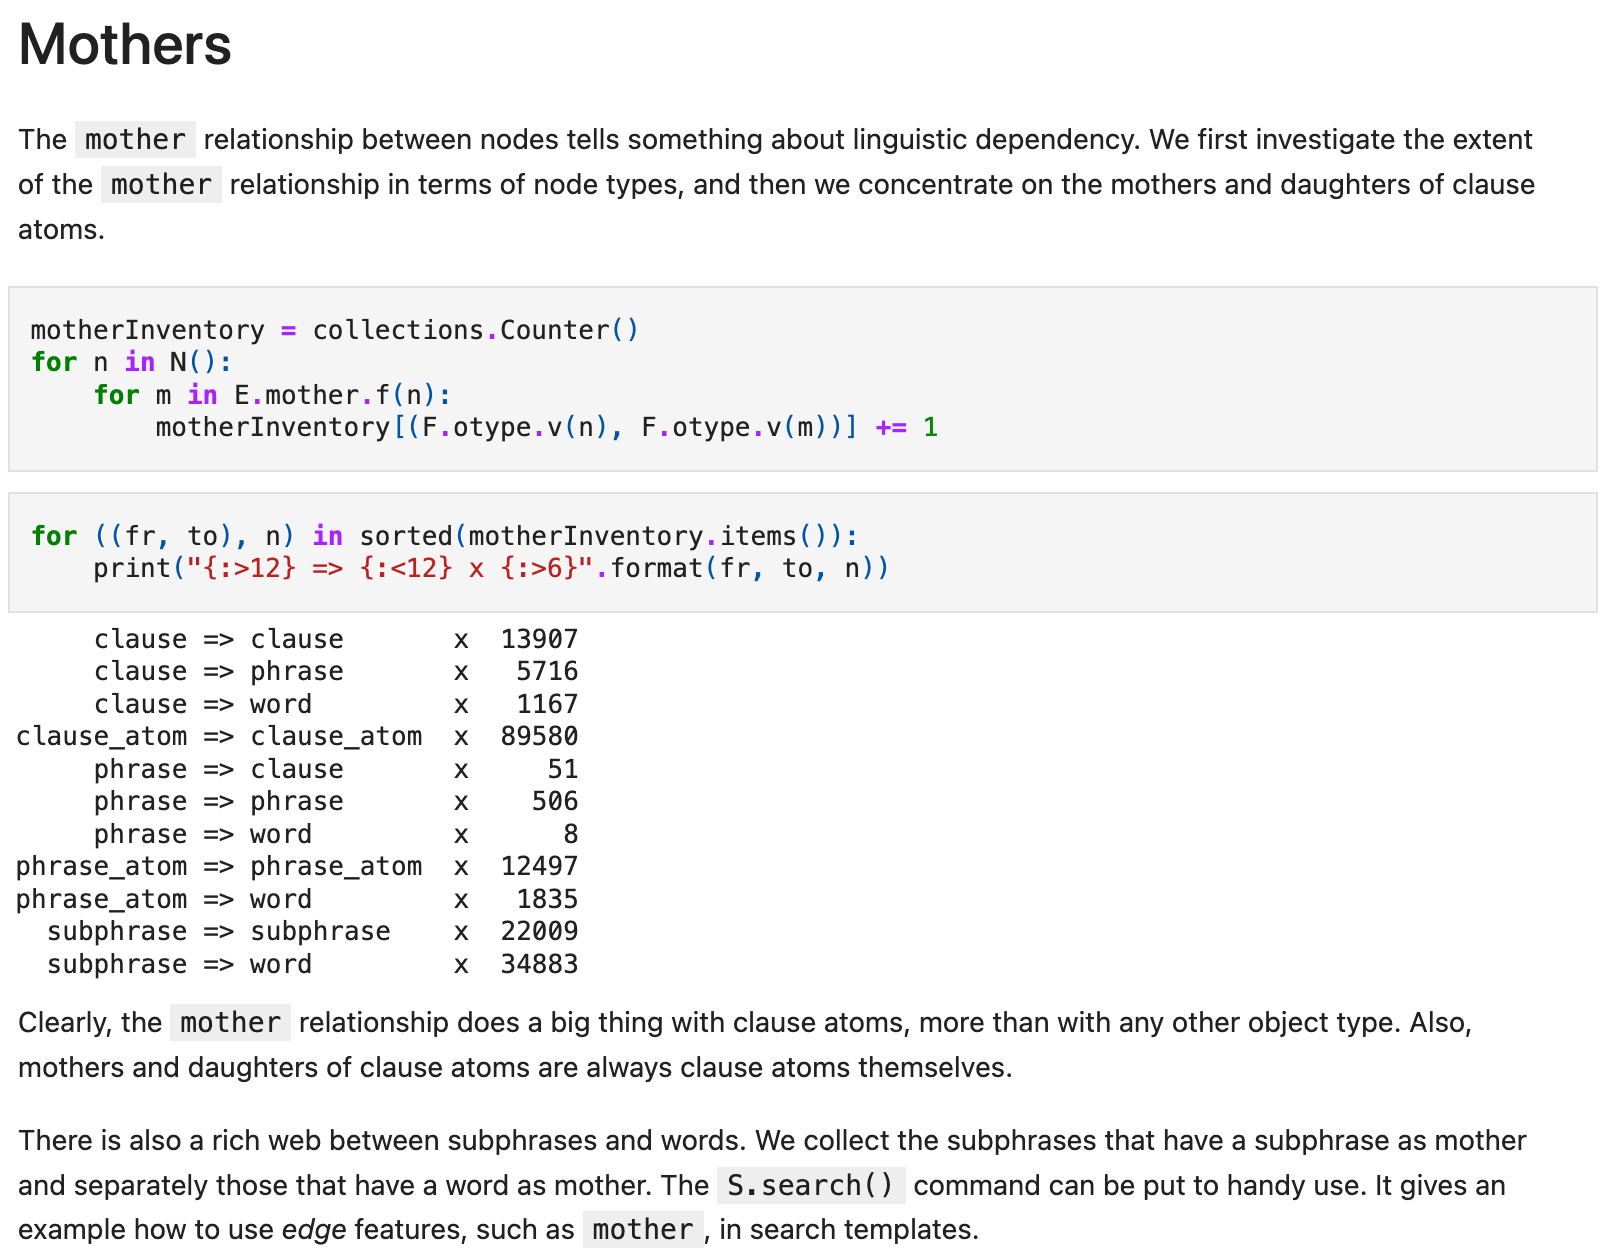



## Looking for Divine Attribution

This query finds all attributive clauses that refer to YHWH, Elohim, or El. Thus, these attributive clauses are describing God in some further detail. For example:

>This is **JHWH**, **who spoke to her{relative clause}**

The TF query below recreates the following SHEBANQ/EMDROS query: http://shebanq.ancient-data.org/hebrew/query?version=2021&id=1121


In [141]:
DivineAttributesNo1 = '''
verse book
 clause rela=Attr
 -mother> word lex=>LHJM/|JHWH/|>L/


'''
DivineAttributesNo1  = BHS.search(DivineAttributesNo1)
BHS.table(DivineAttributesNo1, start=1, end=3, condensed=False, hiddenTypes={'half_verse', 'sentence_atom', 'phrase_atom'}, extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type', 'rela'})

  0.23s 20 results


n,p,verse,clause,word
1,Genesis 3:5,,יֹדְעֵ֖י טֹ֥וב וָרָֽע׃,אלֹהִ֔ים
2,Genesis 3:8,,מִתְהַלֵּ֥ךְ בַּגָּ֖ן לְר֣וּחַ הַיֹּ֑ום,יְהוָ֧ה
3,Genesis 16:13,,הַדֹּבֵ֣ר אֵלֶ֔יהָ,יְהוָה֙


This query finds all cases in which YHWH, Elohim, or El are attributed by adjectival sub-phrases. For example: 


>And he was the priest of **[God{mother-subphrase}, the most high{daughter-subphrase}]**


The TF query below recreates the following SHEBANQ/EMDROS query: http://shebanq.ancient-data.org/hebrew/query?version=2021&id=1124

In [137]:
DivineAttributesNo1 = '''
verse book
 subphrase rela=atr
 -mother> subphrase
     word lex=JHWH/|>LHJM/|>L/


'''
DivineAttributesNo1  = BHS.search(DivineAttributesNo1)
BHS.table(DivineAttributesNo1, start=1, end=3, condensed=False, extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type'},  colorMap={2: 'magenta', 3:'red', 4:'lightblue'})

  0.60s 136 results


n,p,verse,subphrase,subphrase,word
1,Genesis 14:18,,עֶלְיֹֽון׃,אֵ֥ל,אֵ֥ל
2,Genesis 14:19,,עֶלְיֹ֔ון,אֵ֣ל,אֵ֣ל
3,Genesis 14:20,,עֶלְיֹ֔ון,אֵ֣ל,אֵ֣ל


This query finds all nominal clauses (NC) in which YHWH/Elohim/El are attributed by means of an adjectival predicate compliment (the element that functions as a predicate in nominal clauses). For example:

>**God{Subj}** (is) **good {PreC})**.

The TF query below recreates the following SHEBANQ/EMDROS query: http://shebanq.ancient-data.org/hebrew/query?version=2021&id=1125


In [139]:
DivineAttributesNo1 = '''
clause kind=NC
/without/
  word lex=DBR/|XMH/|JWM/|BJT/|JR>H/|M>RH/|M<FH/|QRBH/|PNH/|<JN/|>MRH/|DRK/
/-/
/without/
  word sp=prep
/-/
  phrase function=Subj
    word lex=JHWH/|>LHJM/|>L/
  phrase function=PreC
    word sp=adjv


'''
DivineAttributesNo1  = BHS.search(DivineAttributesNo1)
BHS.table(DivineAttributesNo1, start=1, end=3, condensed=False, extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type'},  colorMap={2: 'magenta', 3:'red', 4:'lightblue'})

  0.87s 112 results


n,p,clause,phrase,word,phrase,word
1,Exodus 9:27,יְהוָה֙ הַצַּדִּ֔יק,יְהוָה֙,יְהוָה֙,הַצַּדִּ֔יק,צַּדִּ֔יק
2,Exodus 20:5,כִּ֣י אָֽנֹכִ֞י יְהוָ֤ה אֱלֹהֶ֨יךָ֙ אֵ֣ל קַנָּ֔א,אָֽנֹכִ֞י יְהוָ֤ה אֱלֹהֶ֨יךָ֙,יְהוָ֤ה,אֵ֣ל קַנָּ֔א,קַנָּ֔א
3,Exodus 20:5,כִּ֣י אָֽנֹכִ֞י יְהוָ֤ה אֱלֹהֶ֨יךָ֙ אֵ֣ל קַנָּ֔א,אָֽנֹכִ֞י יְהוָ֤ה אֱלֹהֶ֨יךָ֙,אֱלֹהֶ֨יךָ֙,אֵ֣ל קַנָּ֔א,קַנָּ֔א


# Assignments
Construct 2-3 queries in the BHS text and use different relational operators.